In [43]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the data
The read_csv() function can now be used to load the dataset into pandas and mount it to a disk. This allows Colab to access the drive and transforms the CSV file into a Pandas dataframe.

In [44]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## View the dataframe
The shape, head, tail, and columns methods of the panadas functions allow us to quickly gauge the size of our dataset. These techniques help us gain a deeper understanding of the data.


df.head(2)

In [45]:
df.shape

(10754, 22)

In [46]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [47]:
df.tail(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [48]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Profiling Data
The practice of thoroughly analyzing the data in an existing dataset and gathering statistics and information about it is known as data profiling.

# Preprocess The Data

In [49]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [51]:
df["team"].value_counts(ascending=False)

,count
team,
Daejeon Hana Citizen,46
Jeonbuk Hyundai Motors,46
FC Seoul,45
Gangwon FC,43
Daegu FC,42
...,...
FC Barcelona,22
Atlético de Madrid,22
CA Osasuna,22


In [52]:
df["award"].value_counts(ascending=False)

,count
award,
0,4773
1,2211
2,1223
3,730
4,460
5,323
6,216
7,199
8,121


In [53]:
df["winger"].unique()

array([0, 1])

In [54]:
df["position_encoded"].unique()

array([1, 2, 3, 4])

In [55]:
df["height"].unique()

array([189.       , 196.       , 188.       , 175.       , 191.       ,
       194.       , 187.       , 185.       , 186.       , 178.       ,
       169.       , 180.       , 183.       , 182.       , 177.       ,
       184.       , 181.       , 179.       , 172.       , 174.       ,
       197.       , 195.       , 190.       , 176.       , 170.       ,
       192.       , 167.       , 198.       , 199.       , 193.       ,
       165.       , 200.       , 173.       , 163.       , 171.       ,
       168.       , 166.       , 202.       , 181.2403529, 164.       ,
       206.       , 160.       , 204.       , 156.       , 162.       ,
       159.       , 161.       ])

In [56]:
df.shape

(10754, 22)

## Data Quality Checks
 involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable

Here are typical steps involved in checking data quality

 **1.Reliability** :

Evaluate the data's source and collection process to determine its trustworthiness

In [57]:
# Licensed in kaggle

**2.Timeliness**:
 Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis

In [58]:
#in 2 season 2021-2022 and 2022-2023

**3.Consistency**:

*Confirm* that the data is consistent within the dataset and across multiple data sources.For example, the same data point should not have different values in different places

In [59]:
#Consistent

**4.Relevance:**

Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**The following are important factors for relevance:**

1. Sample Appropriateness: Verify that the goals of your analysis are met by the data sample you have chosen. For example, using statistics from the Northern region will not provide reliable information for the Kingdom's Western region.


2. Variable Selection: We can use the drop() technique to remove any columns that are irrelevant to our study. Since we are working with columns, we will set the "axis" parameter to 1. To make the change permanent, we will set the "inplace" argument to True.





In [60]:
# the data is relevant

**5. Uniqueness:**

Check for and remove duplicate records to prevent skewed analysis results.

In [61]:
df.duplicated().sum()
# no duplicates columns

0

In [62]:
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [63]:
# check columns types
df.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [64]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [65]:
df.shape

(10754, 22)

In [66]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [67]:
# Completeness
df.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [68]:
# Accurecy types
df.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


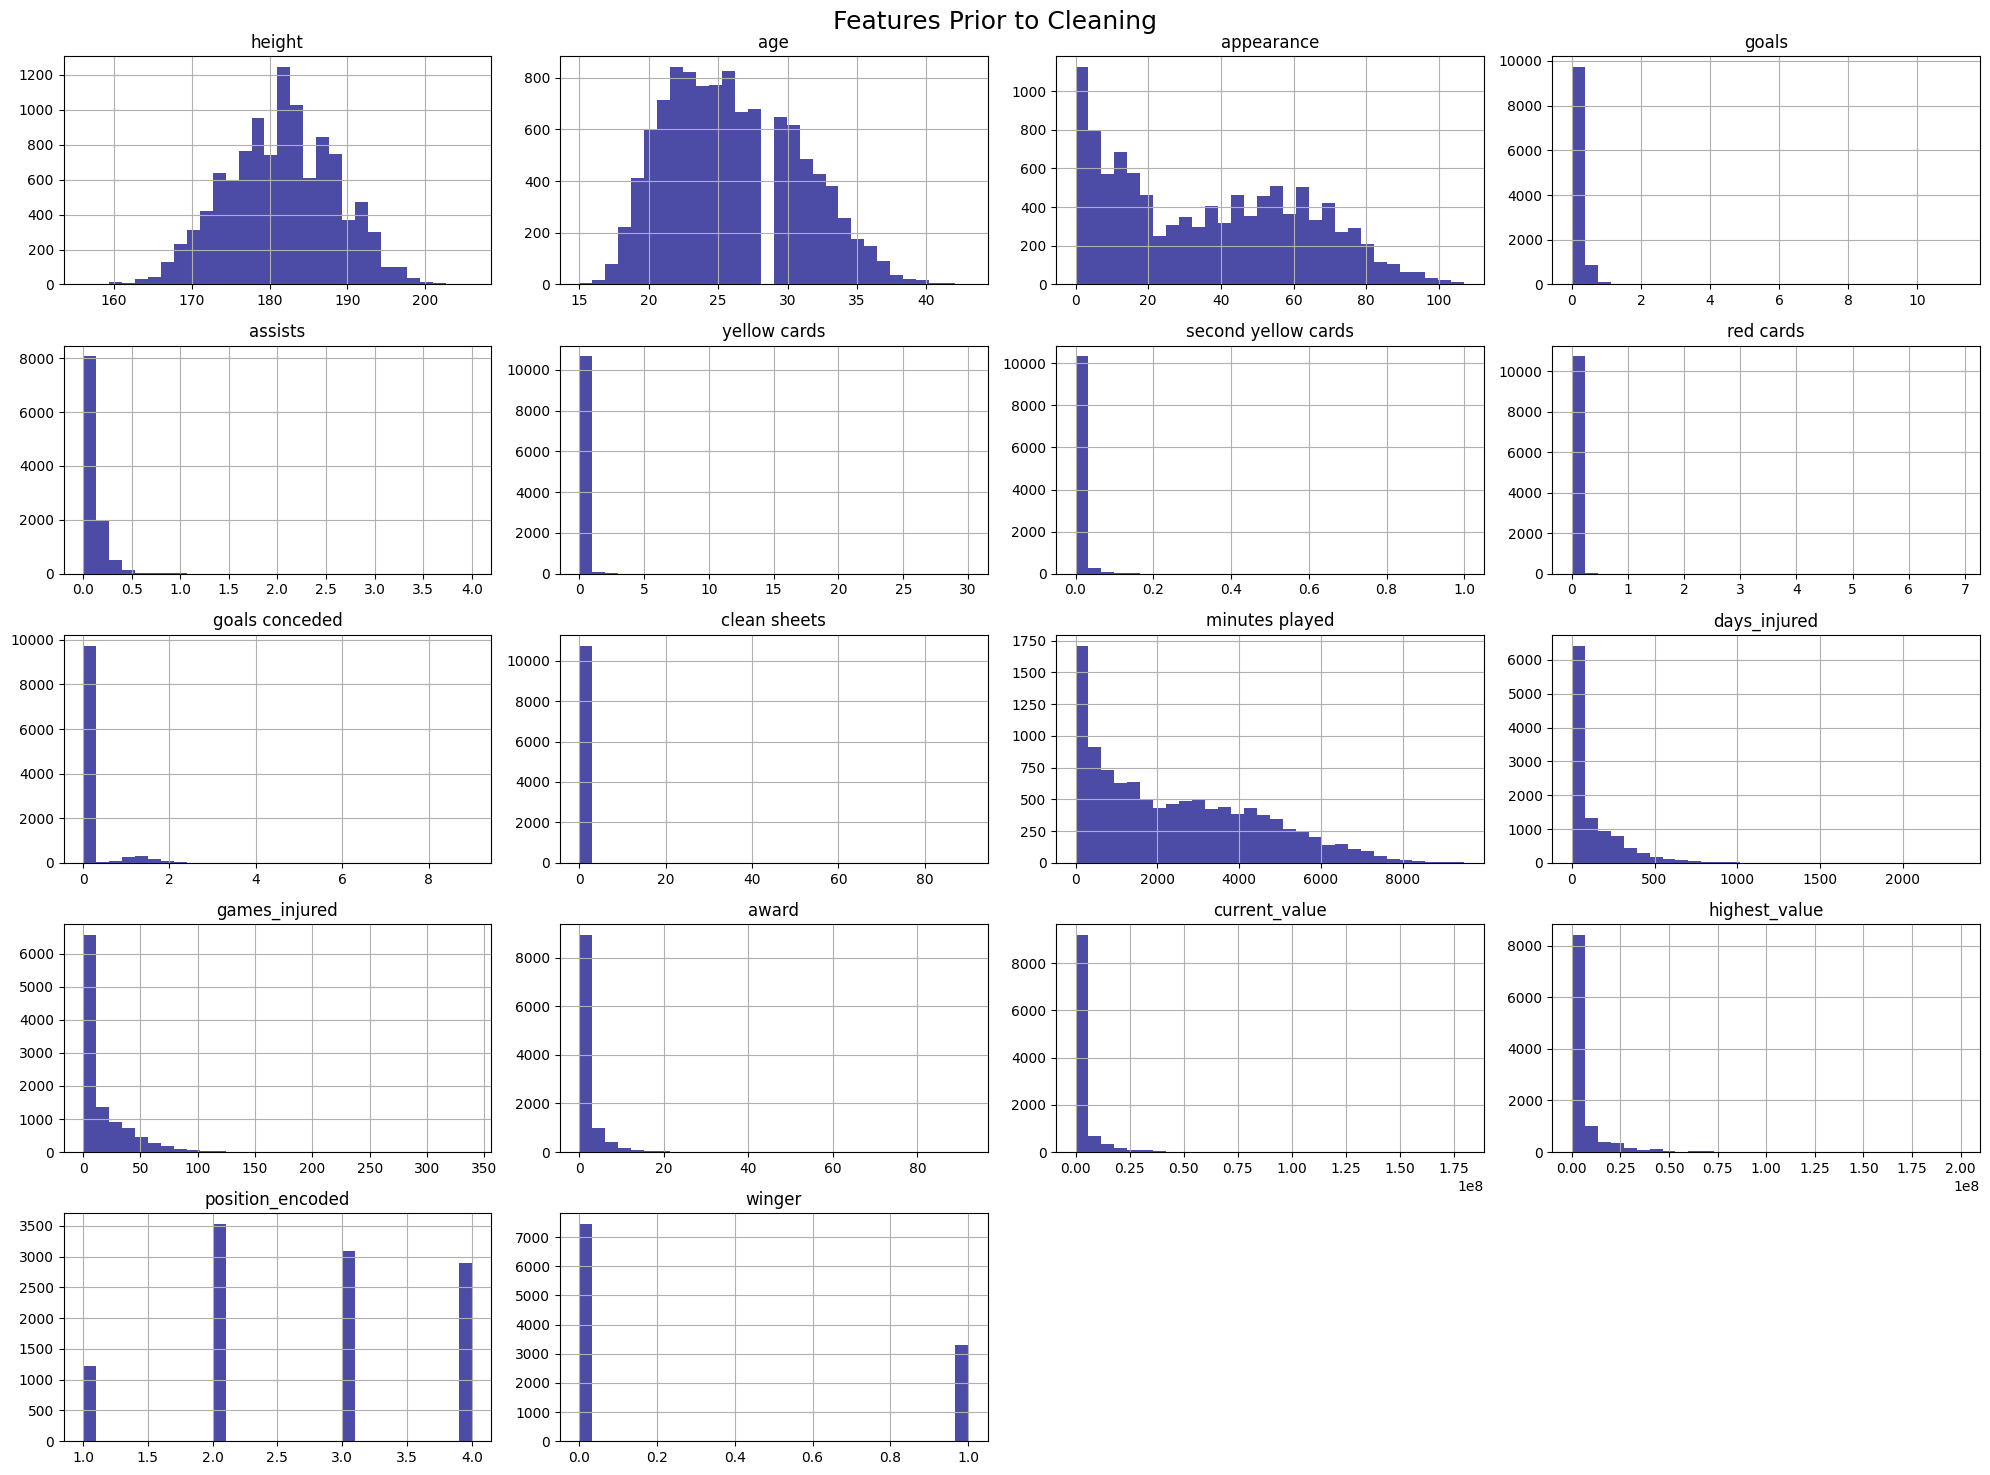

In [69]:
df.hist(bins=30, color='navy', alpha=0.7, figsize=(20, 15))
plt.suptitle("Features Prior to Cleaning", fontsize=18)
plt.tight_layout()
plt.show()

(array([1229.,    0.,    0.,    0.,    0.,    0., 3528.,    0.,    0.,
           0.,    0.,    0.,    0., 3095.,    0.,    0.,    0.,    0.,
           0., 2902.]),
 array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
        2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ]),
 <BarContainer object of 20 artists>)

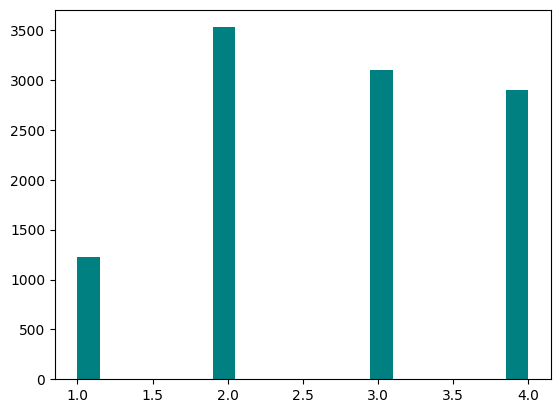

In [70]:
plt.hist(df["position_encoded"], bins=20, color='teal')

(array([4773.,    0., 2211.,    0.,    0., 1223.,    0.,    0.,  730.,
           0.,    0.,  460.,    0.,    0.,  323.,    0.,    0.,  216.,
           0.,  199.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

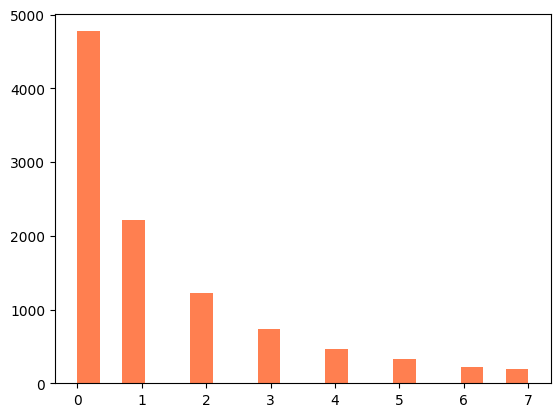

In [71]:
df= df[df["award"] <=7]
plt.hist(df["award"], bins=20, color='coral')

(array([4974., 1127.,  847.,  572.,  412.,  369.,  305.,  257.,  275.,
         203.,  176.,  124.,   91.,   70.,   84.,   46.,   30.,   26.,
          25.,   15.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 ]),
 <BarContainer object of 20 artists>)

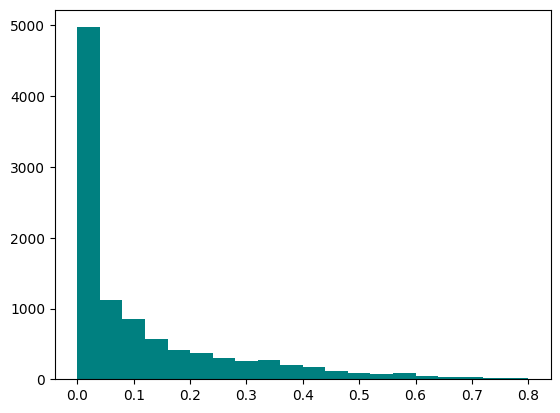

In [72]:
df = df[df["goals"] <= 0.80]
plt.hist(df["goals"], bins=20, color='teal')

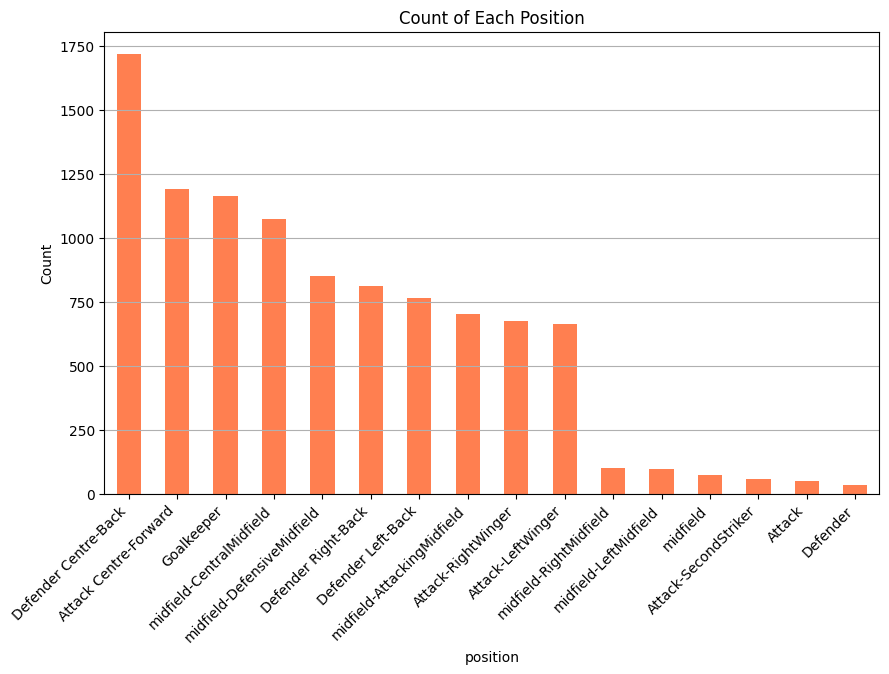

In [73]:
# Count the occurrences of each position
position_counts = df['position'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='coral')
plt.xlabel('position')
plt.ylabel('Count')
plt.title('Count of Each Position')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

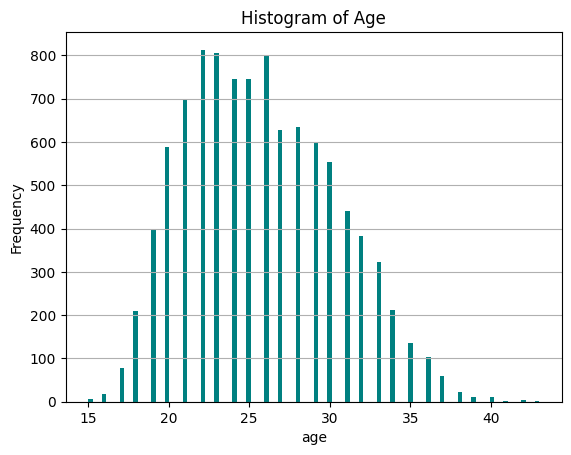

In [74]:
plt.hist(df['age'], bins=100, color='teal')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(axis='y')

In [76]:
df.drop(columns=["team","name", "player"], inplace=True)

In [78]:
#drop whatever doesn't consider normal as a football player desription

df.drop(df[(df['age'] <= 18) | (df['age'] >= 38)].index, inplace=True)
df.drop(df[(df['current_value'] == 0) | (df['highest_value'] == 0)].index, inplace=True)
df.drop(df[(df['appearance'] == 0.00)].index, inplace=True)
df.drop(df[(df['height'] <= 140) | (df['height'] > 200)].index, inplace=True)
df.drop(df[df['current_value'] >= 50000000].index, inplace=True)
df.drop(df[df['current_value'] < 10000].index, inplace=True)
df.drop(df[df['highest_value'] >= 50000000].index, inplace=True)
df.drop(df[df['highest_value'] < 10000].index, inplace=True)
df.drop(df[(df['goals'] == 0.00)].index, inplace=True)

In [79]:
df.shape

(5546, 19)

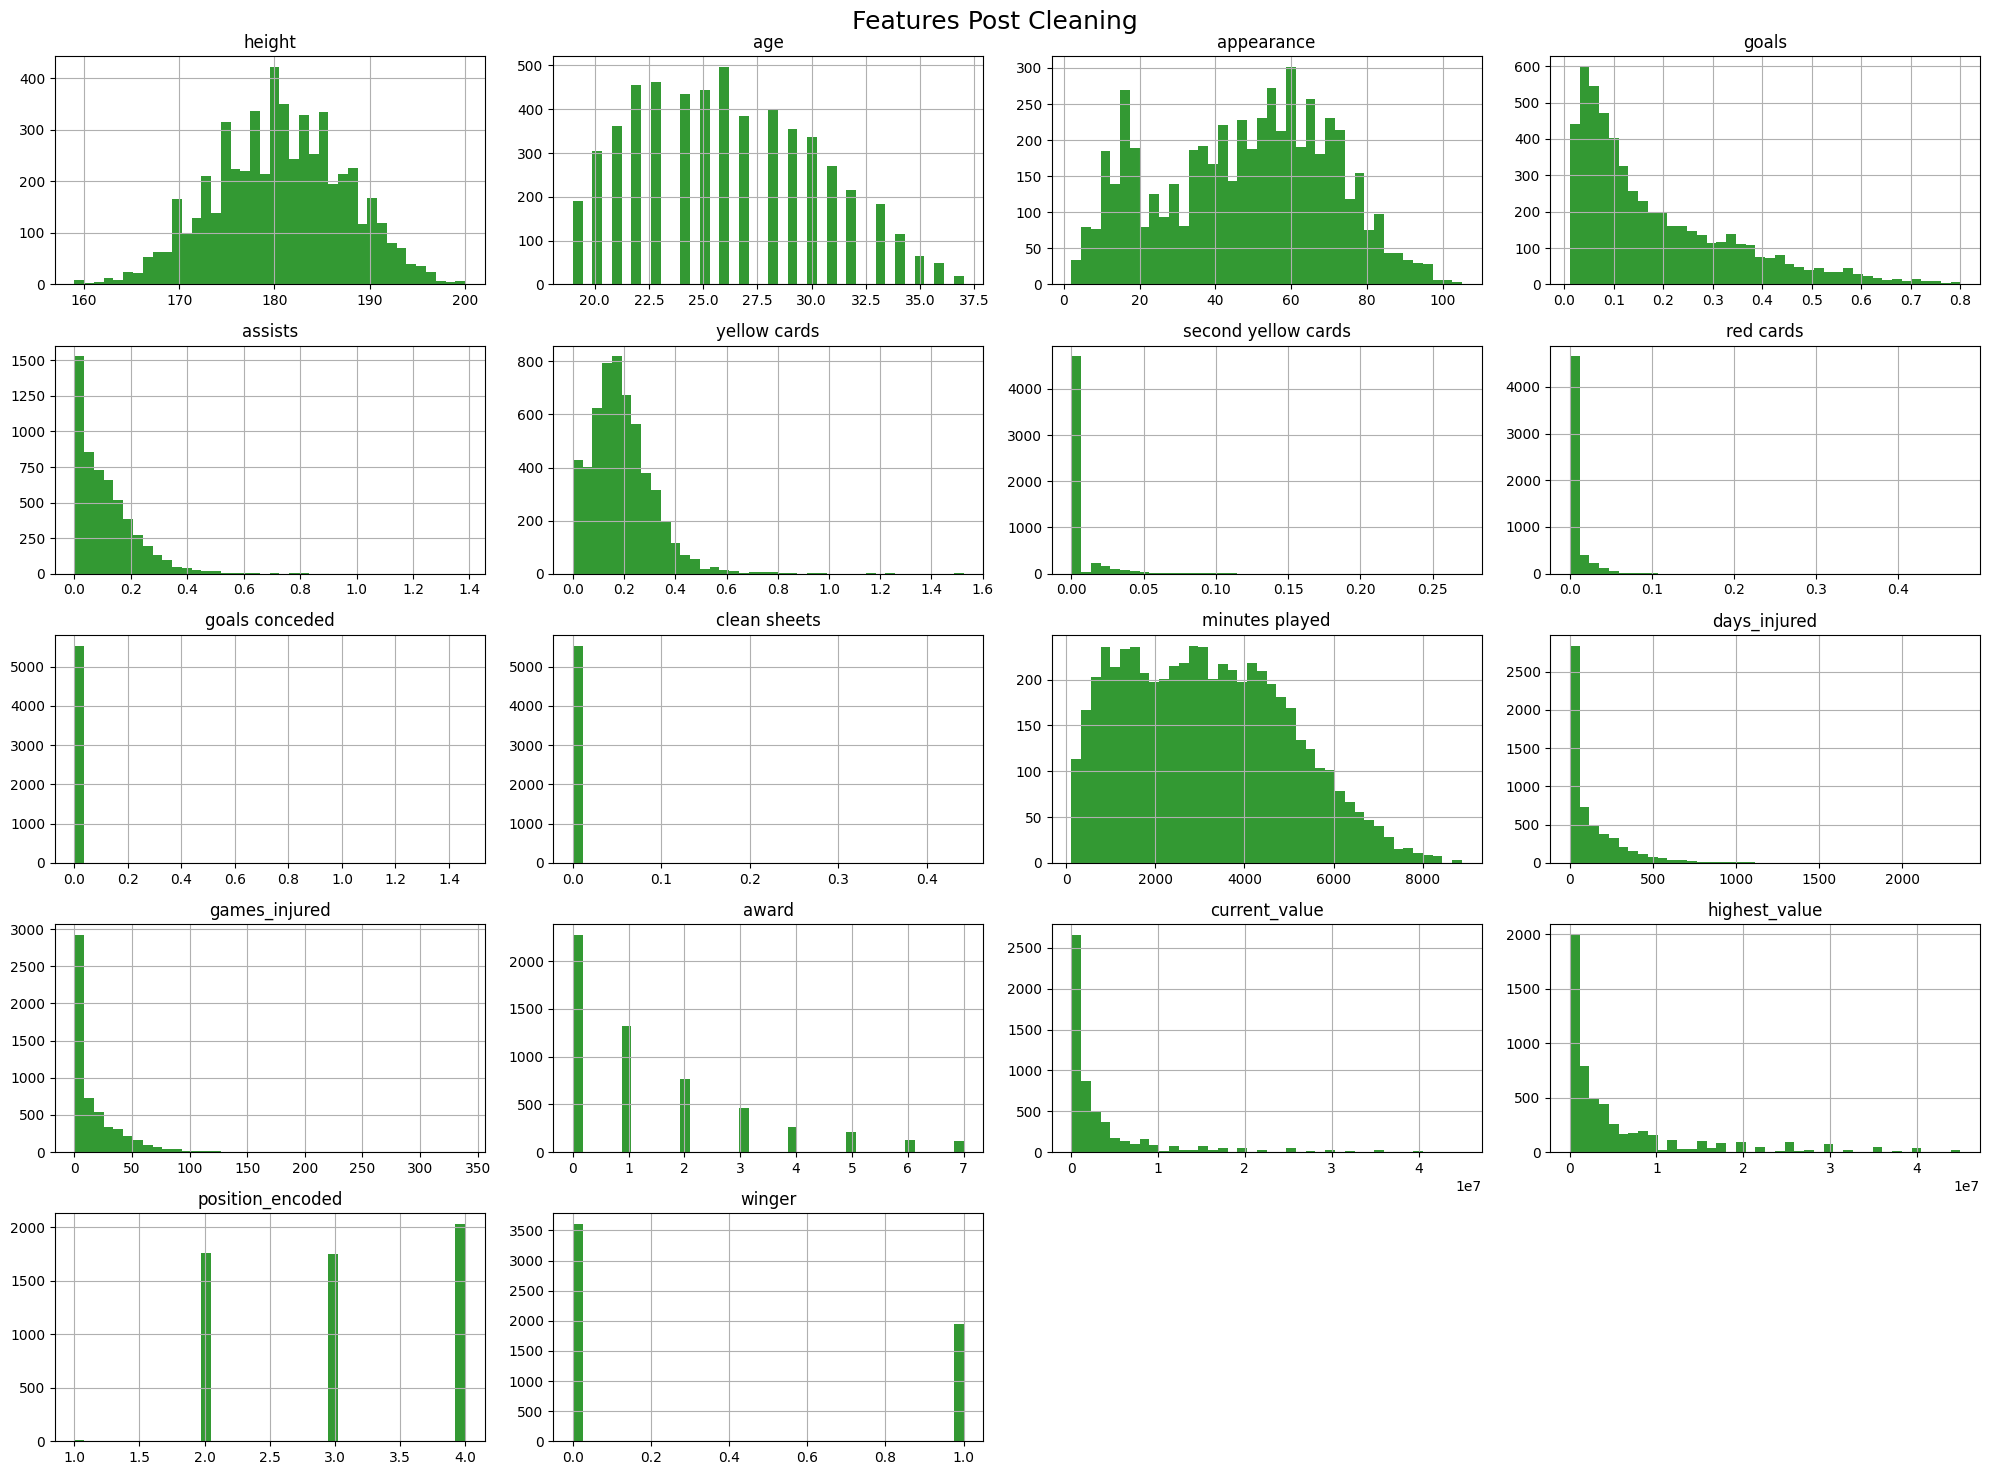

In [80]:
df.hist(bins=40, color='green', alpha=0.8, figsize=(20, 15))
plt.suptitle("Features Post Cleaning", fontsize=18)
plt.tight_layout()
plt.show()

(array([2276.,    0., 1321.,    0.,    0.,  764.,    0.,    0.,  461.,
           0.,    0.,  267.,    0.,    0.,  208.,    0.,    0.,  129.,
           0.,  120.]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <BarContainer object of 20 artists>)

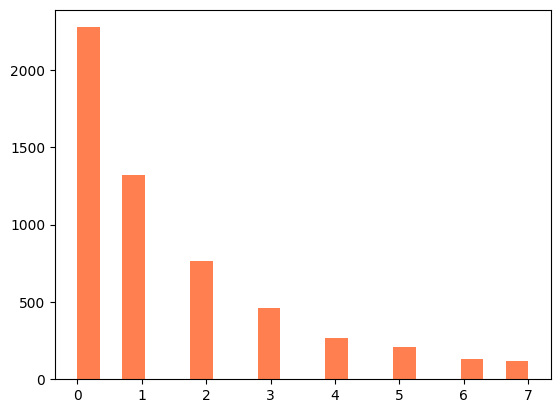

In [81]:
df= df[df["award"] <=7]
plt.hist(df["award"], bins=20, color='coral')

(array([1038., 1018.,  728.,  486.,  394.,  323.,  282.,  232.,  249.,
         184.,  156.,  103.,   85.,   67.,   73.,   41.,   29.,   25.,
          20.,   13.]),
 array([0.01071046, 0.05017494, 0.08963941, 0.12910389, 0.16856837,
        0.20803285, 0.24749732, 0.2869618 , 0.32642628, 0.36589075,
        0.40535523, 0.44481971, 0.48428418, 0.52374866, 0.56321314,
        0.60267762, 0.64214209, 0.68160657, 0.72107105, 0.76053552,
        0.8       ]),
 <BarContainer object of 20 artists>)

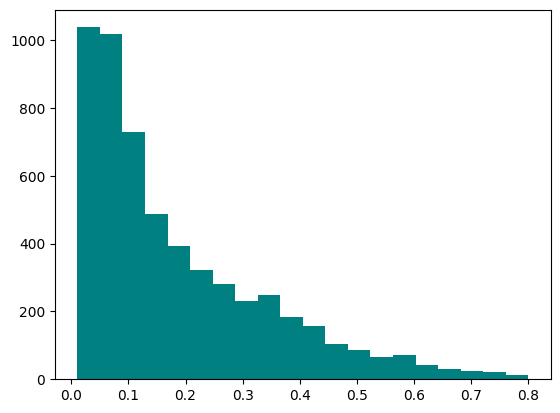

In [82]:
df = df[df["goals"] <= 0.80]
plt.hist(df["goals"], bins=20, color='teal')

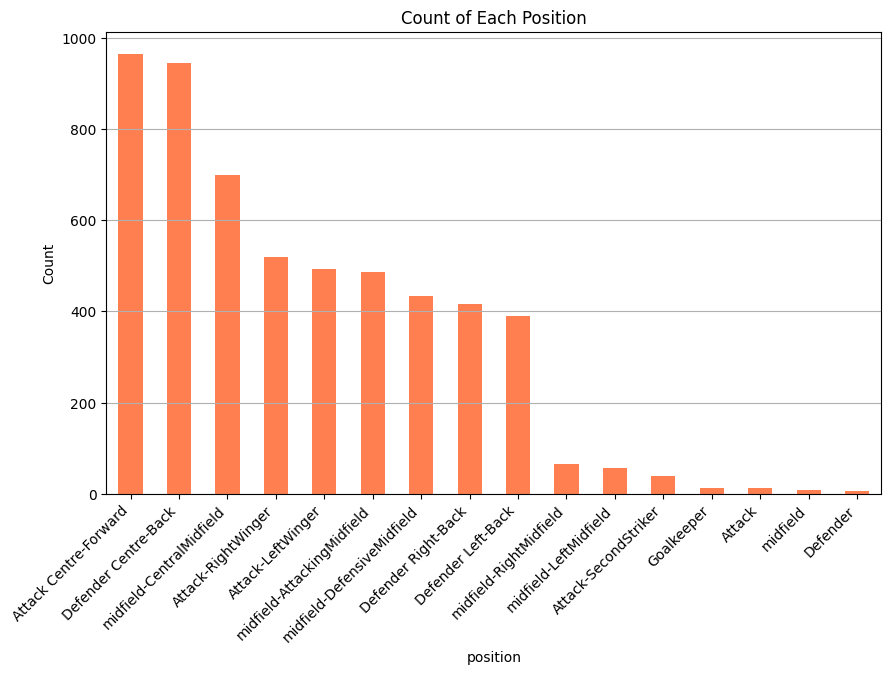

In [83]:
# Count the occurrences of each position
position_counts = df['position'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='coral')
plt.xlabel('position')
plt.ylabel('Count')
plt.title('Count of Each Position')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

In [84]:
least_frequent_positions = df['position'].value_counts().nsmallest(7).index
df['position'] = df['position'].apply(lambda x: 'Other' if x in least_frequent_positions else x)

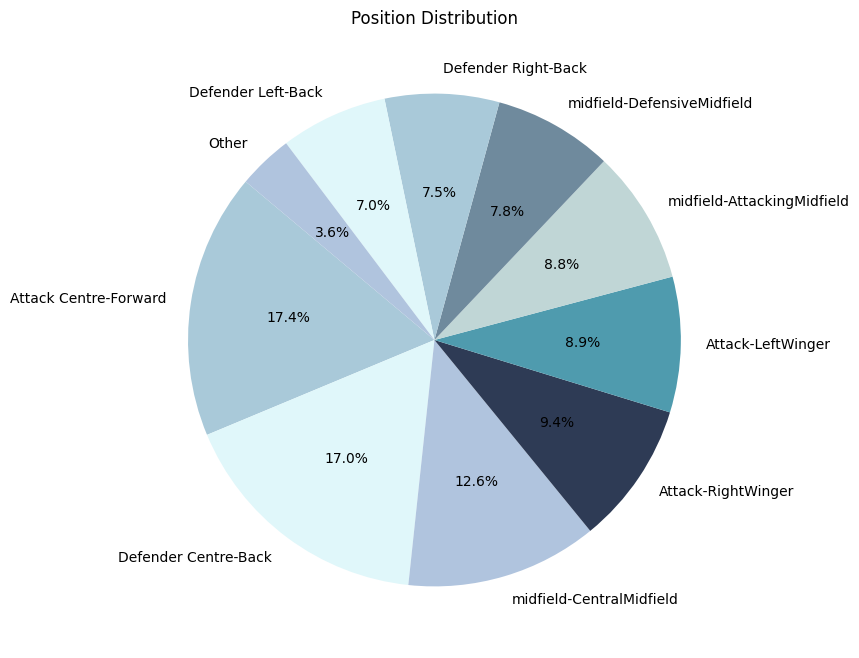

In [85]:
position_counts = df['position'].value_counts()

light_navy_shades = [
     '#A9C9D9',  # Icy Blue (light)
    '#E0F7FA',  # Snowy White (very light, frosty)
    '#B0C4DE',  # Light Steel Blue (frosty tone)
    '#2E3B55',  # Deep Winter Blue (almost navy)
    '#4F9BAE',  # Winter Sky Blue (muted)
    '#C0D6D6',  # Frosty Grey (pale blue-grey)
    '#6F8A9D'   # Cool Steel Blue (muted blue)
]

plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140,
        colors=light_navy_shades)

plt.title('Position Distribution')

plt.show()


**B. Feature engineering**


1.Feature scaling            
2.Aggregation                        
3.One hot coding


In [86]:
df.head(2)

,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
9,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,0.0,0.0,5854,443,70,4,35000000,42000000,2,1
10,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,7132,182,15,3,22000000,22000000,2,1


In [87]:
df.columns

Index(['position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [88]:
categorical_features = ['position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger']

In [89]:
for i in categorical_features:
    print (df[i].value_counts())

position
Attack Centre-Forward         965
Defender Centre-Back          944
midfield-CentralMidfield      698
Attack-RightWinger            519
Attack-LeftWinger             493
midfield-AttackingMidfield    487
midfield-DefensiveMidfield    434
Defender Right-Back           416
Defender Left-Back            390
Other                         200
Name: count, dtype: int64


In [90]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [91]:
df.shape

(5546, 28)

In [92]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Other,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield
9,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
10,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


In [93]:
# Calculate the 25th and 85th percentiles of 'current_value'
p25 = df['current_value'].quantile(0.25)
p65 = df['current_value'].quantile(0.65)

# Function to categorize 'current_value' based on percentiles
def categorize_current_value(current_value):
    if current_value < p25:
        return 'Cheap'
    elif current_value < p65:
        return 'Moderate'
    else:
        return 'Expensive'

# Apply the function to create a new column 'current_value_category'
df['current_value_category'] = df['current_value'].apply(categorize_current_value)

# Optionally, drop the original 'current_value' column
df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['current_value_category'].value_counts())

current_value_category
Moderate     2202
Expensive    1998
Cheap        1346
Name: count, dtype: int64


In [94]:
p25, p65

(500000.0, 2500000.0)

In [95]:
encoder = LabelEncoder()
df['current_value_category'] = encoder.fit_transform(df['current_value_category'])

In [96]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger',
       'position_Attack Centre-Forward', 'position_Attack-LeftWinger',
       'position_Attack-RightWinger', 'position_Defender Centre-Back',
       'position_Defender Left-Back', 'position_Defender Right-Back',
       'position_Other', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'current_value_category'],
      dtype='object')

 **C. Feature selection**

In [97]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category                 1.000000
appearance                             0.139336
minutes played                         0.132774
age                                    0.089319
award                                  0.081002
games_injured                          0.079154
days_injured                           0.070009
assists                                0.065031
position_midfield-AttackingMidfield    0.023407
position_Attack-RightWinger            0.012539
position_midfield-DefensiveMidfield    0.008567
yellow cards                           0.005618
winger                                 0.005092
position_Attack-LeftWinger             0.004769
position_encoded                       0.002883
position_Defender Centre-Back          0.000182
position_Defender Left-Back           -0.001074
position_Defender Right-Back          -0.003670
second yellow cards                   -0.004286
red cards                             -0.004827
position_Attack Centre-Forward        -0

In [101]:
# Set the correlation threshold
threshold = 0.07 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_category']) > \
threshold]['current_value_category'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value_category'],
      dtype='object')

In [102]:
selected_features =['age', 'appearance', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value_category']

In [103]:
df.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger',
       'position_Attack Centre-Forward', 'position_Attack-LeftWinger',
       'position_Attack-RightWinger', 'position_Defender Centre-Back',
       'position_Defender Left-Back', 'position_Defender Right-Back',
       'position_Other', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'current_value_category'],
      dtype='object')

In [104]:
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Attack-LeftWinger,position_Attack-RightWinger,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Other,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,current_value_category
9,178.0,27.0,74,0.015374,0.169115,0.353604,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,1
10,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,1
12,183.0,24.0,72,0.032293,0.048439,0.226050,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,1
15,191.0,26.0,76,0.096010,0.038404,0.384041,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,1
20,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,2


## Data should be prepared.

In [105]:
X = df.drop(['current_value_category'], axis=1)
y = df['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
X.shape

(5546, 27)

## Buliding the Model

In [107]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [108]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'n_estimators':[35, 40, 50, 60,70]
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           verbose=1)

## Train the Model

In [109]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [111]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [35, 40, 50, 60, 70]},
             scoring='f1_macro', verbose=1)

In [113]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 70}

In [114]:
best_model = grid_search.best_estimator_

### Test the Model

In [115]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Evaluating the Model

Accuracy

In [116]:
# our benchmark model
base_model = round(df['current_value_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model

36.03

In [117]:
# Evaluate test set dt model
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy

0.7990990990990992

In [118]:
# Evaluate train set dt model
y_pred_train_rf = rf_classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf)
accuracy

1.0

In [119]:
# Evaluate test set rf model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8486486486486486

In [120]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.9057709648331831

In [121]:
accuracy = accuracy_score(y_test, y_pred_rf_g)
accuracy

0.8405405405405405

In [122]:
print("Train classification report for best rf:")
print(f' {classification_report(y_train, y_pred_train_rf_g, labels=list(best_model.classes_))}')
print(" Test classification report for best rf: ")
print(f'{classification_report(y_test, y_pred_rf_g, labels=list(best_model.classes_))}')

Train classification report for best rf:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86      1083
           1       0.92      0.98      0.95      1571
           2       0.85      0.93      0.89      1782

    accuracy                           0.91      4436
   macro avg       0.92      0.89      0.90      4436
weighted avg       0.91      0.91      0.90      4436

 Test classification report for best rf: 
              precision    recall  f1-score   support

           0       0.98      0.67      0.79       263
           1       0.87      0.94      0.90       427
           2       0.76      0.85      0.80       420

    accuracy                           0.84      1110
   macro avg       0.87      0.82      0.83      1110
weighted avg       0.85      0.84      0.84      1110



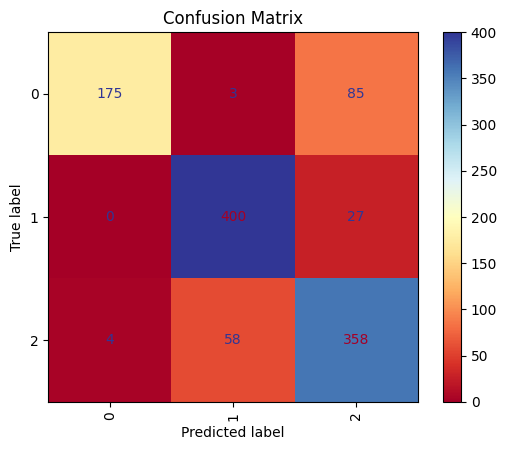

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_g,
                                        display_labels=best_model.classes_,
                                        cmap="RdYlBu",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [124]:
# Calculate Precision
precision = precision_score(y_test, y_pred_rf_g, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.87


In [125]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred_rf_g, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.83


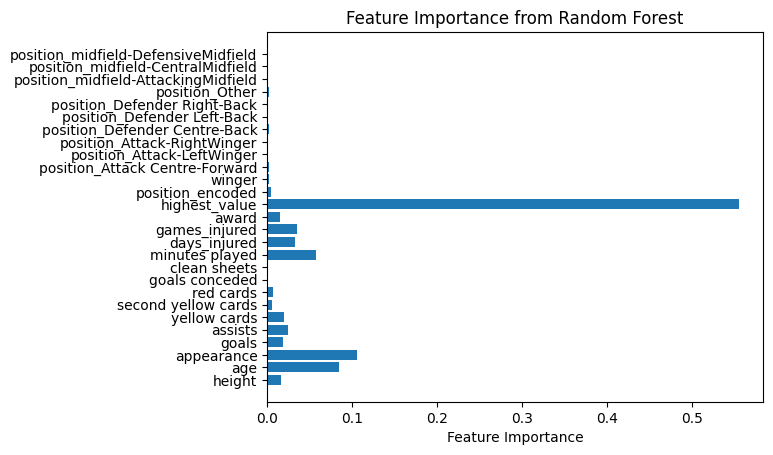

In [126]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()